## Before you begin
You will need to install scikit-image, and restart jupyter notebook. Use the following commands:
```
# install sci-kit image
pip3 install scikit-image

# shut down the currently running Jupyter notebook server
# you can also just hit Ctrl-C in the terminal where you typed "jupyter notebook" to start the server
kill -9 $(ps aux | grep jupyter | grep Library | awk '{print $2}')

# restart the server
jupyter notebook
```

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

First, let's define a function that lets you load images from disk. Note that these images must be in the same directory as this Jupyter notebook file.

In [2]:
def load(image_path):
    """Loads an image from a file path, returning a numpy array of shape(image_height, image_width, 3).
    """
    out = io.imread(image_path)

    # Convert the image to be in the range (0, 1)
    out = out.astype(np.float64) / 255
    return out

Next, we'll load two sample images and test that we can display them.

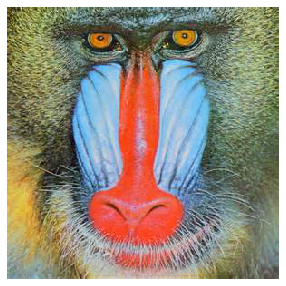

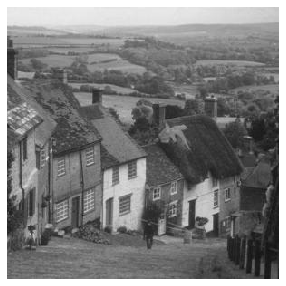

In [3]:
# You can change these paths to point to your own images if you want to try them out for fun.
# If you do, you must include these image files in your submission.
image1_path = './image1.jpg'
image2_path = './image2.jpg'

def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
image1 = load(image1_path)
image2 = load(image2_path)

display(image1)
display(image2)

## Exercise 1: dimming

Recall from lecture that the value of each pixel represents its brightness. Implement a function that takes in an image and returns the same image, but half as bright as the original image.

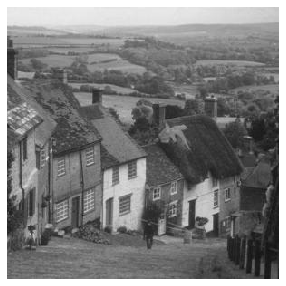

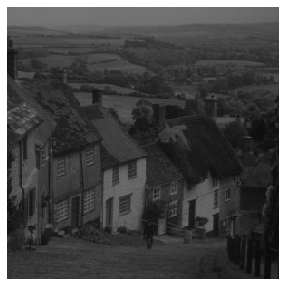

In [4]:
def dim_image(img):
    '''img is an image, represented as a 2D numpy array.'''
    # YOUR CODE GOES HERE
    out = img / 2.0
    # END YOUR CODE
    return out
    
dim_image2 = dim_image(image2)
display (image2)
display (dim_image2)

## Exercise 2: convert to gray scale

Implement a function that takes in an RGB color image and outputs that same image in grayscale.

Hint: You may want to look at the documentation for skimage.color to see if there is something useful there.

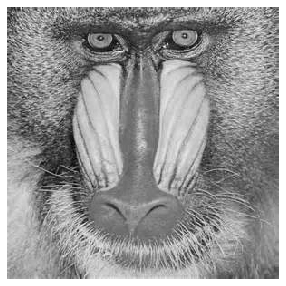

In [5]:
from skimage import color

def convert_to_grayscale(img):
    '''img is an RGB image, represented as a 2D numpy array.'''
    # YOUR CODE GOES HERE
    out = color.rgb2gray(img)
    # END YOUR CODE
    return out
    
grey_image = convert_to_grayscale(image1)
display(grey_image)

## Exercise 3: RGB exclusion

In the video we watched, we saw that you can represent a color image with a 2-dimensional array of pixels, where the R, G, and B pixels are grouped next to each other, and that this is how LCD screens are implemented.

In numpy, the representation is slightly different -- instead of having one 2-dimensional array, we have 3, and each one represents the brightness of the R, G, and B channels.

Implement a function that takes in an image and a channel, and returns an image without the specified channel.

Below is the image without the red channel.


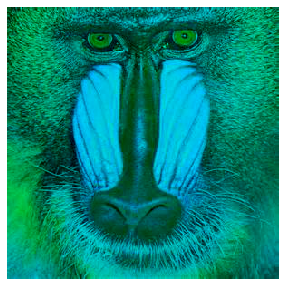

Below is the image without the green channel.


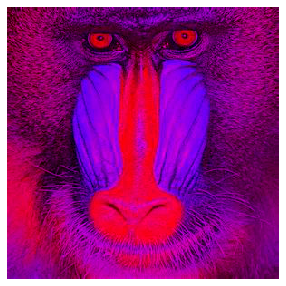

Below is the image without the blue channel.


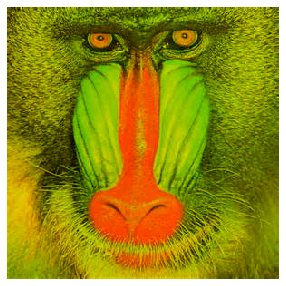

In [6]:
def rgb_exclusion(image, channel):
    """Return image **excluding** the rgb channel specified

    Args:
        image: numpy array of shape(image_height, image_width, 3).
        channel: str specifying the channel. Can be either "R", "G" or "B".

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """
    ### YOUR CODE GOES HERE
    mask = [0 if channel == "R" else 1, 0 if channel == "G" else 1, 0 if channel == "B" else 1]
    out = image * mask
    ### END YOUR CODE

    return out

without_red = rgb_exclusion(image1, 'R')
without_blue = rgb_exclusion(image1, 'B')
without_green = rgb_exclusion(image1, 'G')

print("Below is the image without the red channel.")
display(without_red)

print("Below is the image without the green channel.")
display(without_green)

print("Below is the image without the blue channel.")
display(without_blue)

## Advanced exercise #1: LAB color space

RGB is not the only way that we can represent colors. In this advanced exercise, we'll explore the LAB and HSV color spaces.

Implement a function that takes in an image and an LAB channel, and returns an image without the specified channel. Again, you may want to look at the skimage.color module to see if there's something in there that can help you.



### Note:
To properly display the LAB channels, they need to be changed to something interpretable in rgb. I simply took the LAB channel that I was using and applied that value to all three RGB channels (first dividng by 255 as rgb likes float values from 0 to 1 or ints from 0 to 255). This way the higher the LAB channel value the whiter the image appears and the lower the blacker. This worked for the two LAB color channels, but I found that the luminance channel only ranged from 0 to 100 so I scaled it accordingly as well.


Below is the image with only the L channel.


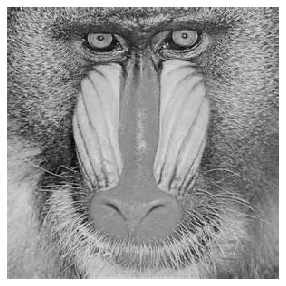

Below is the image with only the A channel.


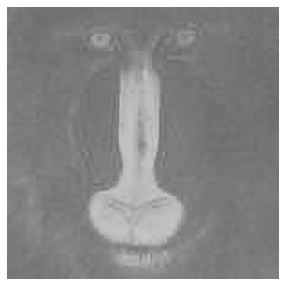

Below is the image with only the B channel.


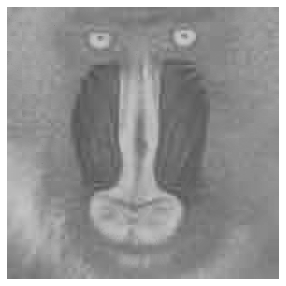

In [7]:
def lab_decomposition(image, channel):
    mask = [1 if channel == "L" else 0, 1 if channel == "A" else 0, 1 if channel == "B" else 0]
    lab_layer = color.rgb2lab(image) * mask
    copy_idx = 0
    
    for i, x in enumerate(mask):
        if x == 1:
            copy_idx = i
    
    for i_y, y in enumerate(image):
        for i_x in range(0, len(y)):
            # https://www.colourphil.co.uk/lab_lch_colour_space.shtml discusses the numbering scheme for the axes
            # L ranges from 0 to 100 while A and B range from -128 to 127
            if copy_idx == 0:
                 lab_layer[i_y][i_x] = [(lab_layer[i_y][i_x][copy_idx]) / 100] * 3
            else:
                lab_layer[i_y][i_x] = [(lab_layer[i_y][i_x][copy_idx] + 128) / 255] * 3
    
    return lab_layer


image_l = lab_decomposition(image1, 'L')
image_a = lab_decomposition(image1, 'A')
image_b = lab_decomposition(image1, 'B')


print("Below is the image with only the L channel.")
display(image_l)

print("Below is the image with only the A channel.")
display(image_a)

print("Below is the image with only the B channel.")
display(image_b)



## Advanced exercise 1a

Explain what the L, A and B channels are and what happens when you take away the L and A channels.

## Explanation:

source: https://www.mathworks.com/discovery/lab-color.html

LAB color space can be thought of as a 3 axis system, or a sphere (so a polar 3d system). The L channel, which I think of as the depth or the distance to the center of the sphere is the luminance, or brightness, while the A and B channels represent the other two axes and contain color information.

The L channel is luminance from black to white
The A channel is color from green to red
The B channel is color from blue to yellow

Without the L and A channels, information about the brightness is gone, and what is left is the color on a spectrum from blue to yellow. In the image of the B channel, black corresponds to blue and white corresponds to yellow. The blue area of our friend's face shows up as black, while the yellow fur and reddish/orange nose, as well as yellow eyes show up as white.

The nose has a lot of red, so the A channel is very high there as it goes from green to red (black to white).

## Advanced exercise 2: HSV exploration

Explain what the H, S and V channels are and what happens when you take away the both the H and S channels.

It may help you to implement a function that performs HSV decomposition and removes these channels; this is optional.

## Explanation

HSV = hue/saturation/value. This model is a cylinder, whose center ranges from black at the bottom to white at the top. 

The bottom to top axis value is similar to luminance in LAB and goes from black to white. 

Moving from the center of the cylinder outwards increases the saturation, or the intensity of a color. The same shade of blue, for example, could be made lighter (more white or more black) or darker (more blue) by moving closer to or away from the center of the cylinder.

Moving around the cylinder controls the hue, or color. Moving around the cylinder could change between colors of the rainbow while moving up and down will make them brighter or darker and moving in and out will make them more colorful or more washed out.

0 value is black
0 saturation is white

I found the wikipedia page on HSV as as well as this image useful: https://www.linuxtopia.org/online_books/graphics_tools/gimp_advanced_guide/img150.gif

From the code below we can see that the nose has high and lowvalues of H, indicating that red corresponds to the 360/0 degree direction around the cylinder (although this shade of red is closer to 0 as the nose is mostly black). The blue on the nose seems to be a fairly neutral gray (so about 180 degrees)

For S, we see that the strong colors (low whiteness) of the nose, eyes, and patch of yellow fur are the strongest, followed by some of the blue along the outer edges of the blue section.

For V, we see that the blue, red, and yellow areas have high values (low blackness), while the black patches have low value, obviously.

Below is the image with only the H channel.


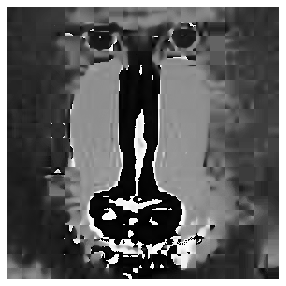

Below is the image with only the S channel.


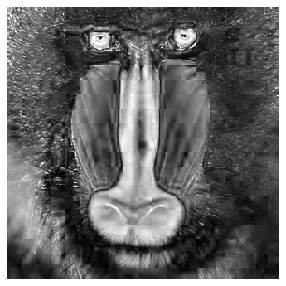

Below is the image with only the V channel.


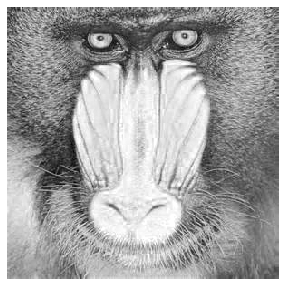

In [8]:
def hsv_decomposition(image, channel):
    # this is pretty much the same as my lab code so making the function generic would be a good idea
    # maybe also a function to make these masks
    mask = [1 if channel == "H" else 0, 1 if channel == "S" else 0, 1 if channel == "V" else 0]
    hsv_layer = color.rgb2hsv(image) * mask
    copy_idx = 0
    
    for i, x in enumerate(mask):
        if x == 1:
            copy_idx = i
    
    for i_y, y in enumerate(image):
        for i_x in range(0, len(y)):
                hsv_layer[i_y][i_x] = [hsv_layer[i_y][i_x][copy_idx]] * 3
    
    return hsv_layer
    


image_h = hsv_decomposition(image1, 'H')
image_s = hsv_decomposition(image1, 'S')
image_v = hsv_decomposition(image1, 'V')


print("Below is the image with only the H channel.")
display(image_h)

print("Below is the image with only the S channel.")
display(image_s)

print("Below is the image with only the V channel.")
display(image_v)



## Advanced exercise 3: combining images

Implement the following method, which takes in two images and returns a new image where the left half of the image is the left half of image1 and the right half of the image is the right half of image2. Exclude the specified channel for the given image. 

You should see the left half of the monkey without the red channel and the right half of the house image with no green channel.

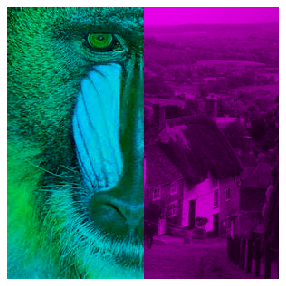

In [9]:
def mix_images(image1, image2, channel1, channel2):
    """
    Args:
        image1: numpy array of shape(image_height, image_width, 3).
        image2: numpy array of shape(image_height, image_width, 3).
        channel1: str specifying channel used for image1.
        channel2: str specifying channel used for image2.

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """
    ### YOUR CODE GOES HERE
    assert(np.shape(image1) == np.shape(image2))
    
    mask1 = [0 if channel1 == "R" else 1, 0 if channel1 == "G" else 1, 0 if channel1 == "B" else 1]
    mask2 = [0 if channel2 == "R" else 1, 0 if channel2 == "G" else 1, 0 if channel2 == "B" else 1]
    
    out = np.copy(image1)
    
    for i_y, y in enumerate(out):
        for i_x in range(0, len(y)):
            if i_x > len(y) / 2:
                out[i_y][i_x] = image2[i_y][i_x] * mask2
            else:
                out[i_y][i_x] *= mask1
    ### END YOUR CODE

    return out

image_mixed = mix_images(image1, image2, channel1='R', channel2='G')
display(image_mixed)


## Advanced exercise 4: exploration

Implement a function that takes a single image, and performs a different operation to each of the 4 quadrants of the image, returning an image that merges the 4 quadrants back together.

For example, you might remove a channel or two from one quadrant, dim or brighten another quadrant, etc.

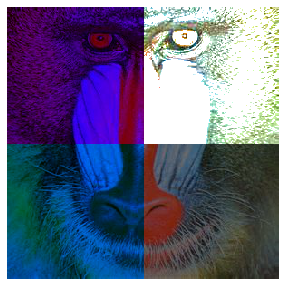

In [10]:
def quadrants(image):
    out = image
    
    mask_1 = [0, 0.5, 1]
    mask_2 = [0.5, 0, 1]
    
    for i_y, y in enumerate(out):
        for i_x in range(0, len(y)):
            if i_x > len(y) / 2:
                if i_y > len(out) / 2:
                    # make bottom right dimmer
                    out[i_y][i_x] *= 0.5
                else:
                    # brighten top right
                    out[i_y][i_x] *= 2.0
                    for i, rgb in enumerate(out[i_y][i_x]):
                        if rgb > 1.0:
                            out[i_y][i_x] = 1.0
            else:
                if i_y > len(out) / 2:
                    # remove red and 50% green from bottom left
                    out[i_y][i_x] *= mask_1
                else:
                    # remove green and 50% red from top left
                    out[i_y][i_x] *= mask_2
    return out

display(quadrants(image1))